In [70]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

import sys
sys.path.append("../../../")
import numpy as np

In [71]:
#this would be a very lengthy calculation but could iterate over product of B gate family (in both gc and gg) with itself, find best combination of #k gates
from src.hamiltonian import ConversionGainHamiltonian
from src.utils.custom_gates import CustomCostGate
from src.basis import MixedOrderBasisCircuitTemplate
from src.utils.polytope_wrap import coverage_to_haar_expectation
from weylchamber import c1c2c3

In [74]:
#this shows combinining 2 conversion-gain gates to minimize expected haar cost
#what is probably more useful is to instead minimize cost on a circuit, so we can get better coverage ie a hard to build swap gate

h = ConversionGainHamiltonian()
SPEED_LIMIT = np.pi/2
denom=16

#TODO rewrite this in a better way that saves progress on these lengthy calculation
#can I have polytopes precomputed and saved somewhere?

data = []
coord_data = []
for j in [0,2,4,6]: #iterate from iswap to B family
    temp_data = []
    temp_coord_data = []
    for i in range(0,7,1):
        cost = sum([np.pi/(4+i), j*np.pi/denom])/SPEED_LIMIT
        u = h._construct_U_lambda(np.pi/(4+i), j*np.pi/denom)(1).full()
        gate1 = CustomCostGate(u, f"B({np.pi/(4+i), j*np.pi/denom})", cost=cost)

        basis_gates = [gate1]# ,gate3]
        basis = MixedOrderBasisCircuitTemplate(base_gates=basis_gates, chatty_build=False)
        temp_data.append((i, coverage_to_haar_expectation(basis.coverage)))
        temp_coord_data.append(c1c2c3(gate1.to_matrix()))
    data.append(temp_data)
    coord_data.append(temp_coord_data)

INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.0))
0.79012	 | B((0.7853981633974483, 0.0)).B((0.7853981633974483, 0.0))
0.20988	 | B((0.7853981633974483, 0.0)).B((0.7853981633974483, 0.0)).B((0.7853981633974483, 0.0))


INFO:root:Haar-expectation cost: 1.1049413181578387
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.6283185307179586, 0.0))
0.23409	 | B((0.6283185307179586, 0.0)).B((0.6283185307179586, 0.0))
0.76525	 | B((0.6283185307179586, 0.0)).B((0.6283185307179586, 0.0)).B((0.6283185307179586, 0.0))
0.00065	 | B((0.6283185307179586, 0.0)).B((0.6283185307179586, 0.0)).B((0.6283185307179586, 0.0)).B((0.6283185307179586, 0.0))


INFO:root:Haar-expectation cost: 1.1066247458609564
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.5235987755982988, 0.0))
0.06819	 | B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0))
0.89170	 | B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0))
0.04011	 | B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0))
0.00000	 | B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0)).B((0.5235987755982988, 0.0))


INFO:root:Haar-expectation cost: 0.9906453092188571
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.4487989505128276, 0.0))
0.02163	 | B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0))
0.41893	 | B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0))
0.55663	 | B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0))
0.00281	 | B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0))
0.00000	 | B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0)).B((0.4487989505128276, 0.0))


INFO:root:Haar-expectation cost: 1.0116066232571963
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.39269908169872414, 0.0))
0.00757	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.18553	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.76678	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.03998	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))
0.00014	 | B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0)).B((0.39269908169872414, 0.0))


INFO:root:Haar-expectation cost: 0.9598936659817359
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.3490658503988659, 0.0))
0.00291	 | B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0))
0.08310	 | B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0))
0.45376	 | B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0))
0.45460	 | B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0))
0.00563	 | B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0))
0.00000	 | B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0)).B((0.3490658503988659, 0.0))


INFO:root:Haar-expectation cost: 0.972655707413066
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.3141592653589793, 0.0))
0.00121	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0))
0.03854	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0))
0.25204	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0))
0.66809	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0))
0.03946	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0))
0.00065	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0))
0.00000	 | B((0.3141592653589793, 0.0)).B((0.3141592653589793, 0.0)).B((0.3

INFO:root:Haar-expectation cost: 0.9416039876915193
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.7853981633974483, 0.39269908169872414))
0.95827	 | B((0.7853981633974483, 0.39269908169872414)).B((0.7853981633974483, 0.39269908169872414))
0.04173	 | B((0.7853981633974483, 0.39269908169872414)).B((0.7853981633974483, 0.39269908169872414)).B((0.7853981633974483, 0.39269908169872414))


INFO:root:Haar-expectation cost: 1.5312968527381312
INFO:root:==== Working to build a set of covering polytopes ====
INFO:root:==== Haar volumes ====


 deg 0	 | Sequence name
0.00000	 | 
0.00000	 | B((0.6283185307179586, 0.39269908169872414))
0.62183	 | B((0.6283185307179586, 0.39269908169872414)).B((0.6283185307179586, 0.39269908169872414))
0.37752	 | B((0.6283185307179586, 0.39269908169872414)).B((0.6283185307179586, 0.39269908169872414)).B((0.6283185307179586, 0.39269908169872414))
0.00065	 | B((0.6283185307179586, 0.39269908169872414)).B((0.6283185307179586, 0.39269908169872414)).B((0.6283185307179586, 0.39269908169872414)).B((0.6283185307179586, 0.39269908169872414))


INFO:root:Haar-expectation cost: 1.5462369590085763
INFO:root:==== Working to build a set of covering polytopes ====


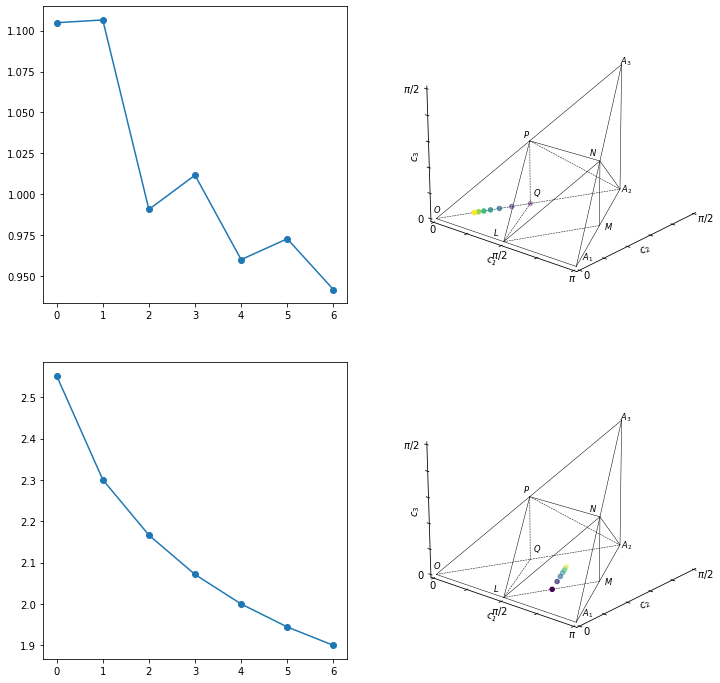

In [ ]:
#TODO eventually move this to src.utils.visualize module once flushed out

import matplotlib.pyplot as plt
from src.utils.visualize import weyl_training_plot
plt.close()
fig = plt.figure(figsize=(12,6*len(data)))
for index, family_data in enumerate(zip(data,coord_data)):
    axs = fig.add_subplot(len(data), 2, 2*index+1)
    axs.plot(*zip(*(family_data[0])), '-o')

    axs= fig.add_subplot(len(data),2,2*index+2, projection="3d")
    weyl_training_plot(axs, family_data[1])